In [2]:
#import all the essential libraries and packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy import stats
from scipy.stats import t, ttest_ind_from_stats
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from pandas.io.json import json_normalize

import datetime
from datetime import datetime, timedelta
import requests
import sys
import json
from bs4 import BeautifulSoup

In [110]:
def last_30_days(date):                                       # function to calculate last 30 days
    date_list = [date - timedelta(days=x) for x in range(30)]
    return sorted(date_list)

def from_date(x):                                           # function to calculate the from_param
    from_date=[]
    for i in range(len(x)):
        from_date.append(last_30_days(datetime.today())[i].date())
    return from_date

def to_date(x):                                         # function to calculate the to_param
    to_date=[]
    for i in range(len(x)):
        to_date.append(last_30_days(datetime.today())[i].date())
    return to_date
    

from_date_list = from_date(last_30_days(datetime.today()))
to_date_list = to_date(last_30_days(datetime.today()))


In [111]:
#Extract 100 articles from each day for past 30 days 

from newsapi import NewsApiClient

url = 'http://newsapi.org/v2/everything?'
newsapi_1 = NewsApiClient(api_key='cf478da0d8784f26877dc94b06b0f8e8')


data_1 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_1.get_everything(q='covid OR coronavirus',language='en',sort_by='relevancy',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_1 = data_1.append(d)

data_1

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12T14:04:34Z,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12T18:31:26Z,As people across the United States continue to...,mashable,Mashable
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12T20:43:26Z,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12T19:34:00Z,Florida broke the nations covid-19 single-day ...,None,Gizmodo.com
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12T13:18:42Z,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters
...,...,...,...,...,...,...,...,...,...
95,"Eli Cahan, Maxwell Strachan",U.S. Caregivers Struggle With Coronavirus in M...,"Even in normal times, life as a caregiver is t...",https://www.vice.com/en_us/article/5dzjv3/us-c...,https://video-images.vice.com//articles/5f2d9c...,2020-08-10T12:00:00Z,Jeff Christensen has been on the go a lot late...,vice-news,Vice News
96,Carla Sinclair,Students and staff infected with Covid-19 at G...,The Georgia high school that suspended two stu...,https://boingboing.net/2020/08/10/students-and...,https://i2.wp.com/media.boingboing.net/wp-cont...,2020-08-10T15:25:34Z,The Georgia high school that suspended two stu...,None,Boing Boing
97,Tara Law,Confirmed Coronavirus Cases in U.S. Children R...,As decision-makers weigh whether to reopen U.S...,https://time.com/5878094/coronavirus-cases-chi...,https://api.time.com/wp-content/uploads/2020/0...,2020-08-10T20:23:14Z,As decision-makers weigh whether to reopen U.S...,time,Time
98,Reuters Editorial,UPDATE 1-Uganda central bank holds lending rat...,UPDATE 1-Uganda central bank holds lending rat...,https://af.reuters.com/article/ugandaNews/idAF...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-10T10:16:00Z,"(Adds details) \r\nKAMPALA, Aug 10 (Reuters) -...",reuters,Reuters


In [112]:
#Extract 100 articles from each day for past 30 days 

newsapi_2 = NewsApiClient(api_key='b50f5b54f58c4d6f85449b398aad75ed')

data_2 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_2.get_everything(q='covid OR coronavirus',language='en',sort_by='publishedAt',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_2 = data_2.append(d)
data_2

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,157640,E*Trade Equity Edge,The E*TRADE Equity Edge Online Developer Platf...,https://www.programmableweb.com/api/etrade-equ...,https://www.programmableweb.com/sites/default/...,2020-07-13T00:00:00Z,Coronavirus Developer Resource Center\r\nCOVID...,None,Programmableweb.com
1,35683,Trimble Trip Management Get Route to Next Stop,The Trimble Trip Management Get Route to Next ...,https://www.programmableweb.com/api/trimble-tr...,https://www.programmableweb.com/sites/default/...,2020-07-13T00:00:00Z,Coronavirus Developer Resource Center\r\nCOVID...,None,Programmableweb.com
2,35683,Trimble Trip Management Get Planned Trip,The Trimble Trip Management Get Planned Trip A...,https://www.programmableweb.com/api/trimble-tr...,https://www.programmableweb.com/sites/default/...,2020-07-13T00:00:00Z,Coronavirus Developer Resource Center\r\nCOVID...,None,Programmableweb.com
3,"Dominic Fenn, Jonny Coppel, Jessica Kearney, L...",Walkie talkies to aid health care workers’ com...,,https://ccforum.biomedcentral.com/articles/10....,https://media.springernature.com/w110/springer...,2020-07-13T00:00:00Z,None,None,Biomedcentral.com
4,"Wentao Ni, Xiuwen Yang, Deqing Yang, Jing Bao,...",Role of angiotensin-converting enzyme 2 (ACE2)...,An outbreak of pneumonia caused by severe acut...,https://ccforum.biomedcentral.com/articles/10....,https://media.springernature.com/w110/springer...,2020-07-13T00:00:00Z,None,None,Biomedcentral.com
...,...,...,...,...,...,...,...,...,...
95,PR Newswire,Regenerative Organic Certified™ (ROC™) Standar...,"The Regenerative Organic Alliance (ROA), a gro...",https://news.yahoo.com/regenerative-organic-ce...,https://s.yimg.com/uu/api/res/1.2/n2l6Uw.ZvdlQ...,2020-08-10T23:44:00Z,Regenerative Organic Certified Products from A...,None,Yahoo Entertainment
96,Chad Lyle,Smash Mouth is being dragged for tone-deaf cor...,Speaking to a live audience of thousands on Su...,https://www.dailydot.com/irl/smash-mouth-coron...,https://www.dailydot.com/wp-content/uploads/20...,2020-08-10T23:43:57Z,Speaking to a live audience of thousands on Su...,None,The Daily Dot
97,Brooke Seipel,Liberty University names acting president afte...,Liberty University announced on Monday that it...,https://thehill.com/homenews/news/511415-liber...,https://thehill.com/sites/default/files/articl...,2020-08-10T23:43:43Z,Liberty University announced on Monday that it...,the-hill,The Hill
98,Le Nga,15th Covid-19 patient dies in Vietnam,Vietnam lost another Covid-19 patient on Monda...,https://e.vnexpress.net/news/news/15th-covid-1...,https://vcdn-english.vnecdn.net/2020/08/11/a23...,2020-08-10T23:43:27Z,"Tagged as ""Patient 522,"" the man was a residen...",None,Vnexpress.net


In [113]:
#Extract 100 articles from each day for past 30 days 

newsapi_3 = NewsApiClient(api_key='94c52cf4fa594701a4df007e26d08eac')

data_3 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_3.get_everything(q='covid OR coronavirus',language='en',sort_by='popularity',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_3 = data_3.append(d)
data_3

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Elizabeth Yuko,How to See a Comet That Won't Be Visible for A...,"Thanks to COVID-19, you may not get to take yo...",https://lifehacker.com/how-to-see-a-comet-that...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12T13:00:00Z,"Thanks to COVID-19, you may not get to take yo...",None,Lifehacker.com
1,Sid Sijbrandij,Hybrid Remote Work Offers the Worst of Both Wo...,"Post-pandemic, many companies plan to allow em...",https://www.wired.com/story/hybrid-remote-work...,https://media.wired.com/photos/5efd2182437ef26...,2020-07-12T13:00:00Z,"Remote work, once considered a novelty or an o...",wired,Wired
2,Laura Mallonee,Inside the Milan Hotel That Housed Covid-19 Pa...,Photographer Alberto Bernasconi donned full pr...,https://www.wired.com/story/inside-the-milan-h...,https://media.wired.com/photos/5f0b16b75de658d...,2020-07-12T14:13:22Z,Hotel Michelangelo is a fine place to stay. Lo...,wired,Wired
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12T19:34:00Z,Florida broke the nations covid-19 single-day ...,None,Gizmodo.com
4,Jody Serrano,"Bill Gates, a Billionaire, Says Covid-19 Drugs...","Microsoft founder Bill Gates, a billionaire, s...",https://gizmodo.com/bill-gates-a-billionaire-s...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12T23:57:00Z,"Microsoft founder Bill Gates, a billionaire, s...",None,Gizmodo.com
...,...,...,...,...,...,...,...,...,...
95,Diego Oré,Mexico's legendary masked wrestlers thrown out...,Mexico's legendary masked wrestlers have been ...,https://www.reuters.com/article/us-health-coro...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-08-10T18:51:00Z,MEXICO CITY (Reuters) - Mexico’s legendary mas...,reuters,Reuters
96,Diego Oré,Mexico's legendary masked wrestlers thrown out...,Mexico's legendary masked wrestlers have been ...,https://uk.reuters.com/article/uk-health-coron...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-08-10T18:43:00Z,MEXICO CITY (Reuters) - Mexico’s legendary mas...,reuters,Reuters
97,Byron Kaye,PREVIEW-Pay out or stay out? Dividends in doub...,Australian companies are likely to deliver sma...,https://in.reuters.com/article/us-australia-ea...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-10T05:50:00Z,SYDNEY (Reuters) - Australian companies are li...,reuters,Reuters
98,Reuters Editorial,UPDATE 1-Uganda central bank holds lending rat...,UPDATE 1-Uganda central bank holds lending rat...,https://af.reuters.com/article/ugandaNews/idAF...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-10T10:16:00Z,"(Adds details) \r\nKAMPALA, Aug 10 (Reuters) -...",reuters,Reuters


In [114]:
# Combine all three datasets to make a large dataframe consisting of all extracted articles
frames = [data_1, data_2, data_3]

all_articles = pd.concat(frames)

all_articles

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12T14:04:34Z,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12T18:31:26Z,As people across the United States continue to...,mashable,Mashable
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12T20:43:26Z,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12T19:34:00Z,Florida broke the nations covid-19 single-day ...,None,Gizmodo.com
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12T13:18:42Z,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters
...,...,...,...,...,...,...,...,...,...
95,Diego Oré,Mexico's legendary masked wrestlers thrown out...,Mexico's legendary masked wrestlers have been ...,https://www.reuters.com/article/us-health-coro...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-08-10T18:51:00Z,MEXICO CITY (Reuters) - Mexico’s legendary mas...,reuters,Reuters
96,Diego Oré,Mexico's legendary masked wrestlers thrown out...,Mexico's legendary masked wrestlers have been ...,https://uk.reuters.com/article/uk-health-coron...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-08-10T18:43:00Z,MEXICO CITY (Reuters) - Mexico’s legendary mas...,reuters,Reuters
97,Byron Kaye,PREVIEW-Pay out or stay out? Dividends in doub...,Australian companies are likely to deliver sma...,https://in.reuters.com/article/us-australia-ea...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-10T05:50:00Z,SYDNEY (Reuters) - Australian companies are li...,reuters,Reuters
98,Reuters Editorial,UPDATE 1-Uganda central bank holds lending rat...,UPDATE 1-Uganda central bank holds lending rat...,https://af.reuters.com/article/ugandaNews/idAF...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-10T10:16:00Z,"(Adds details) \r\nKAMPALA, Aug 10 (Reuters) -...",reuters,Reuters


In [115]:
# Save the combined dataframe as raw file in csv format for later use and documentation purposes
all_articles.to_csv('raw_data/raw_articles.csv', index = False)

In [3]:
#to keep the content consistent, let's open the rawfile assigning it to a new name
df_covid = pd.read_csv('raw_data/raw_articles.csv')

In [4]:
#change the publication date into something more readable
df_covid['publishedAt'] = pd.to_datetime(df_covid['publishedAt']).apply(lambda x: x.date())

In [5]:
#check the number of duplicate articles based on the url column
print("Number of Duplicate Articles:")
print(df_covid.duplicated(subset='url').sum())

Number of Duplicate Articles:
2048


In [6]:
#drop any duplicates from the dataframe by keeping the first occurence of it
df_covid.drop_duplicates(subset='url', keep = "first", inplace = True)
df_covid.shape

(6952, 9)

In [7]:
# Let's check all the columns using info; looks like some columns have null values
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6952 entries, 0 to 8999
Data columns (total 9 columns):
author         6271 non-null object
title          6951 non-null object
description    6909 non-null object
url            6952 non-null object
urlToImage     6575 non-null object
publishedAt    6952 non-null object
content        6613 non-null object
source.id      3627 non-null object
source.name    6952 non-null object
dtypes: object(9)
memory usage: 543.1+ KB


In [8]:
#Looks are there are null values from most of the columns, but content and description column are the most important for future analysis
df_covid.isna().sum() 

author          681
title             1
description      43
url               0
urlToImage      377
publishedAt       0
content         339
source.id      3325
source.name       0
dtype: int64

In [9]:
# We will be using text from title, description, and also content columns
# Let's drop the rows that has no content or description, as we cannot generate much text from those

df_covid = df_covid.dropna(subset = ['content', 'description']) 
print("Shape of the final dataset:")
df_covid.shape

Shape of the final dataset:


(6599, 9)

In [10]:
# For some feature engineering adding word count columns for both description and content can be useful parameters later:

df_covid['descr_word_count']=df_covid['description'].apply(lambda x: len(x.strip().split()))  # word count in description
df_covid['descr_unique_words']=df_covid['description'].apply(lambda x:len(set(str(x).split()))) # number of unique words in description
df_covid['content_word_count']=df_covid['content'].apply(lambda x: len(x.strip().split()))  # word count in content
df_covid['content_unique_words']=df_covid['content'].apply(lambda x:len(set(str(x).split()))) # number of unique words in content

In [11]:
#Let's take a look at the data and new columns
df_covid.head(10)

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,descr_word_count,descr_unique_words,content_word_count,content_unique_words
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News,13,13,29,29
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12,As people across the United States continue to...,mashable,Mashable,41,38,32,30
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News,14,14,31,27
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12,Florida broke the nations covid-19 single-day ...,NaN,Gizmodo.com,42,35,34,30
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters,20,20,21,21
5,Reuters Editorial,Safety first for Spaniards voting amid new cor...,Voters in northern Spain wore face masks and u...,https://www.reuters.com/article/us-spain-polit...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-07-12,BILBAO (Reuters) - Voters in northern Spain wo...,reuters,Reuters,33,32,34,33
6,Reuters Editorial,NHL clubs ordered not to release COVID-19 or i...,The NHL announced on Saturday that teams will ...,https://www.reuters.com/article/us-icehockey-n...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-07-12,The NHL announced on Saturday that teams will ...,reuters,Reuters,24,23,34,32
7,Nupur Anand,Bollywood's Bachchan family hit by coronavirus...,Three generations of Bollywood's Bachchan fami...,https://www.reuters.com/article/us-health-coro...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-07-12,MUMBAI (Reuters) - Three generations of Bollyw...,reuters,Reuters,39,35,32,30
8,HT Entertainment Desk,Priyanka Chopra sends prayers to Amitabh Bachc...,<ol><li>Priyanka Chopra sends prayers to Amita...,https://www.hindustantimes.com/bollywood/priya...,https://www.hindustantimes.com/rf/image_size_9...,2020-07-12,"Actors Priyanka Chopra, Tiger Shroff and other...",NaN,Hindustan Times,31,28,33,31
9,Lidia Kelly,Australia's Victoria state marks week of tripl...,Australia's Victoria state reported 273 new ca...,https://www.reuters.com/article/us-health-coro...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-07-12,MELBOURNE (Reuters) - Australia’s Victoria sta...,reuters,Reuters,33,29,32,30


In [12]:
#Newsapi sources endpoint allows you to map each data source to its category. 
#Let's use this information as an additional feature in our dataset. This may be useful later.
d = {}
response = requests.get('https://newsapi.org/v2/sources?&apiKey=cf478da0d8784f26877dc94b06b0f8e8')
response = response.json()
for s in response['sources']:
    d[s['name']] = s['category'] 
# I am choosing to match the category with the name, as source.name column did not have any null values
d

{'ABC News': 'general',
 'ABC News (AU)': 'general',
 'Aftenposten': 'general',
 'Al Jazeera English': 'general',
 'ANSA.it': 'general',
 'Argaam': 'business',
 'Ars Technica': 'technology',
 'Ary News': 'general',
 'Associated Press': 'general',
 'Australian Financial Review': 'business',
 'Axios': 'general',
 'BBC News': 'general',
 'BBC Sport': 'sports',
 'Bild': 'general',
 'Blasting News (BR)': 'general',
 'Bleacher Report': 'sports',
 'Bloomberg': 'business',
 'Breitbart News': 'general',
 'Business Insider': 'business',
 'Business Insider (UK)': 'business',
 'Buzzfeed': 'entertainment',
 'CBC News': 'general',
 'CBS News': 'general',
 'CNN': 'general',
 'CNN Spanish': 'general',
 'Crypto Coins News': 'technology',
 'Der Tagesspiegel': 'general',
 'Die Zeit': 'business',
 'El Mundo': 'general',
 'Engadget': 'technology',
 'Entertainment Weekly': 'entertainment',
 'ESPN': 'sports',
 'ESPN Cric Info': 'sports',
 'Financial Post': 'business',
 'Focus': 'general',
 'Football Italia':

In [13]:
# function to map source name to its category
def category(source, m):
    try:
        return m[source]
    except:
        return 'Source not listed'

df_covid['category'] = df_covid['source.name'].map(lambda s: category(s, d))

In [14]:
# Exploring the new dataset
df_covid

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,descr_word_count,descr_unique_words,content_word_count,content_unique_words,category
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News,13,13,29,29,general
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12,As people across the United States continue to...,mashable,Mashable,41,38,32,30,entertainment
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News,14,14,31,27,general
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12,Florida broke the nations covid-19 single-day ...,NaN,Gizmodo.com,42,35,34,30,Source not listed
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters,20,20,21,21,general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,NaN,Man City sign World Cup-winning USA midfielder...,Manchester City sign USA international and 201...,https://www.bbc.co.uk/sport/football/53692655,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2020-08-10,Sam Mewis (right) helped USA win the 2019 Worl...,bbc-news,BBC News,12,12,35,30,general
8929,"Kevin Dotson and Hollie Silverman, CNN",College sports' 'Power Five' leaders are discu...,"Leaders from college sports' ""Power Five"" conf...",https://www.cnn.com/2020/08/10/us/college-spor...,https://cdn.cnn.com/cnnnext/dam/assets/2008100...,2020-08-10,"(CNN)Leaders from college sports' ""Power Five""...",cnn,CNN,37,32,30,27,general
8930,NaN,Georgia teen says school used students as guin...,CNN's Boris Sanchez talks to North Paulding Hi...,https://www.cnn.com/videos/us/2020/08/09/georg...,https://cdn.cnn.com/cnnnext/dam/assets/2008091...,2020-08-10,Chat with us in Facebook Messenger. Find out w...,cnn,CNN,42,36,16,15,general
8932,https://www.facebook.com/bbcnews,Chicago protests: Restrictions imposed after c...,Chicago officials say over 100 arrests have be...,https://www.bbc.co.uk/news/world-us-canada-537...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-08-10,Image copyrightReuters\r\nChicago police will ...,bbc-news,BBC News,16,16,32,29,general


In [15]:
# After processing the raw data and adding the extra features a columns, save the processed data in a csv format for documentation
df_covid.to_csv('processed_data/processed_articles.csv', index = False)

In [16]:
#to keep the content consistent, let's open the processed file assigning it to a new name
df_processed = pd.read_csv('processed_data/processed_articles.csv')

In [17]:
df_processed.describe()

,descr_word_count,descr_unique_words,content_word_count,content_unique_words
count,6599.000000,6599.000000,6599.000000,6599.000000
mean,31.586604,28.664949,33.422791,30.903167
std,10.054808,8.475150,4.522826,4.117830
min,2.000000,2.000000,5.000000,5.000000
25%,25.000000,23.000000,32.000000,30.000000
50%,34.000000,30.000000,34.000000,32.000000
75%,40.000000,35.000000,36.000000,33.000000
max,53.000000,48.000000,45.000000,41.000000


In [18]:
# Let's check how many rows did not have any category assigned due to source not being listed in the newsapi
(df_processed['category'] == 'Source not listed').sum()

3136

### Looks like more than half the dataset had news articles from sources that was not listed in the newsapi sources endpoint. To get a general idea of the content of the articles let's check the distribution of the different categories across the dataset.

Text(0.5, 1.0, 'Distribution of Categories across the dataset')

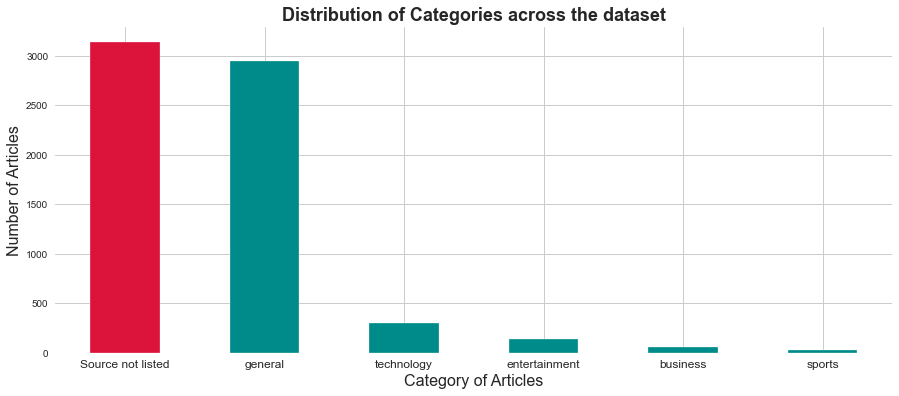

In [19]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
df_processed['category'].value_counts().plot(kind='bar', figsize=(15, 6), color=['crimson', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan'])
plt.xlabel("Category of Articles", fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel("Number of Articles", fontsize=16)
plt.title("Distribution of Categories across the dataset", fontsize=18, weight='bold')

#### As evident from the bar plot, most of the sources for the articles were not listed as part of the NewsAPI sources endpoint. Many mixed topics are included in the "general" category which is the largest catergory for our articles dataset. This only gives us a high level idea of our dataset, a very superficial classification of the news. It does not tell us the underlying topics or the most relevant news per each category.

#### To analyze the articles deeper, we will have to process the descriptions and contents of each article since the words in the articles naturally carry more meaning.

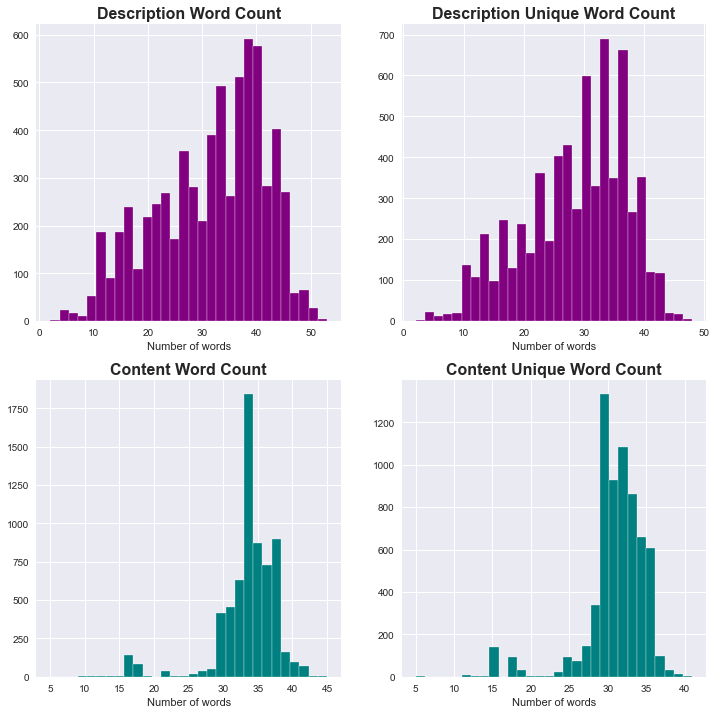

In [20]:
# The description column gives a description or snippet from the article 
# and the content column gives the unformatted content of the article truncated to 200 chars.
# Let's now check the disctribution of the word counts for the description and content columns.
plt.style.use('seaborn')
fig= plt.figure(figsize=(12,12))

ax1 = plt.subplot(221)
plt.hist(df_processed.descr_word_count, bins=30, color='purple')
plt.title('Description Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(222)
plt.hist(df_processed.descr_unique_words, bins=30, color='purple')
plt.title('Description Unique Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(223)
plt.hist(df_processed.content_word_count, bins=30, color='teal')
plt.title('Content Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(224)
plt.hist(df_processed.content_unique_words, bins=30, color='teal')
plt.title('Content Unique Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

plt.show()

##### From the above graphs, we can see the distribution of the words counts in both description and content columns which are our columns of interest for further analysis. The description column has a wider range of word counts anywhere from 10 to 45 words. The description column length and word count is dependent on article to article as in what snippet from the article is provided by the NewsApi. Whereas the content column is already truncated to 200 characters by NewsApi and hence we see narrow range of word counts anywhere between 30 to 40 words.

##### The interesting and useful part is that the unique words count column for both description and content are almost similar to their respective word count columns. This means even though we have limited content due to restrictions of the free version of NewsApi, most of the content provided is not useful which will help a lot in our further analysis of articles.


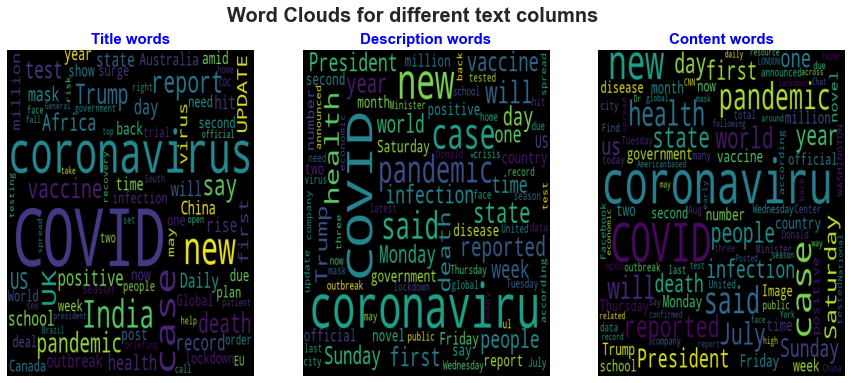

In [21]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('chars')
stopwords.add('Reuters')
stopwords.add('li')
stopwords.add('ha')
stopwords.add('char')
stopwords.add('ol')
    
title_words = ''
for i in df_processed.title:
    i = str(i)
    seperate = i.split()
    title_words += " ".join(seperate)+" "
    
descr_words = ''
for i in df_processed.description:
    i = str(i)
    seperate = i.split()
    descr_words += " ". join(seperate)+" "
    
content_words = ''
for i in df_processed.content:
    i = str(i)
    seperate = i.split()
    content_words += " ".join(seperate)+" "

    
wordcloud1 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(title_words)

wordcloud2 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(descr_words)

wordcloud3 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(content_words)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
fig.suptitle('Word Clouds for different text columns', weight='bold', fontsize=20)

ax1.set_title('Title words', weight='bold', fontsize=15, color='b')
im1 = ax1.imshow(wordcloud1, aspect='auto')
ax1.axis("off")

ax2.set_title('Description words', weight='bold', fontsize=15, color='b')
im2 = ax2.imshow(wordcloud2, aspect='auto')
ax2.axis("off")


ax3.set_title('Content words', weight='bold', fontsize=15, color='b')
im3 = ax3.imshow(wordcloud3, aspect='auto')
ax3.axis("off")

plt.show()

##### From the above wordclouds of different text columns from the dataset we see that as expected all articles are related to covid or coronavirus or pandemic. We can also see names of different countries indicating articles covering world updates with some data and records. Also possible articles about vaccines and political leaders. Now that we have an idea of what kind of articles we have in the dataset, lets dig deeper to by some text pre-processing steps 

## Data Pre-processing and Tokenization

In [22]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity, linear_kernel
import gensim

In [23]:
df_processed['combined_text'] = df_processed['content'].map(str) + df_processed['title'].map(str) + df_processed['description'].map(str)

In [24]:
df_processed.head()

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,descr_word_count,descr_unique_words,content_word_count,content_unique_words,category,combined_text
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News,13,13,29,29,general,Image copyrightReutersImage caption\r\n Abhish...
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12,As people across the United States continue to...,mashable,Mashable,41,38,32,30,entertainment,As people across the United States continue to...
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News,14,14,31,27,general,Image copyrightAFPImage caption\r\n This is th...
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12,Florida broke the nations covid-19 single-day ...,NaN,Gizmodo.com,42,35,34,30,Source not listed,Florida broke the nations covid-19 single-day ...
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters,20,20,21,21,general,"Posted \r\nIndia's most famous actor, Amitabh ..."


In [48]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub(r'\b\w{,2}\b', ' ', text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [49]:
import re
import nltk
nltk.download('stopwords')
additional_stop_words = ['chars', 'Reuters', 'li', 'ha', 'char', 'ol', 'ul']
stoplist = stopwords.words('english') + list(punctuation) + additional_stop_words

tokenizer = RegexpTokenizer(r'\w+')
def tokenize(text):
    results = []
    text = clean_text(text)
    for token in tokenizer.tokenize(text):
        if token not in stoplist:
            results.append(token)
    return results
    #[token for token in tokenizer.tokenize(x) if token not in stoplist]
    #return tokenizer.tokenize(x)

#token for token in word_tokenize(text) if token not in stoplist

df_processed['tokens'] = df_processed['combined_text'].map(tokenize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asha2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
for combined_text, tokens in zip(df_processed['combined_text'].head(5), df_processed['tokens'].head(5)):
    print('combined_text:', combined_text)
    print('tokens:', tokens)
    print()

combined_text: Image copyrightReutersImage caption
 Abhishek (L) said his wife and daughter would self-isolate at home
Three generations of a high-profile Bollywood family have tested positive for Covid-19, offic… [+3432 chars]Coronavirus: Three generations of Bollywood Bachchan family infectedActress Aishwarya Rai Bachchan, her father-in-law, husband and daughter test positive for Covid-19.
tokens: ['image', 'copyrightreutersimage', 'caption', 'abhishek', 'said', 'wife', 'daughter', 'would', 'self', 'isolate', 'home', 'three', 'generations', 'high', 'profile', 'bollywood', 'family', 'tested', 'positive', 'covid', 'offic', 'coronavirus', 'three', 'generations', 'bollywood', 'bachchan', 'family', 'infectedactress', 'aishwarya', 'rai', 'bachchan', 'father', 'law', 'husband', 'daughter', 'test', 'positive', 'covid']

combined_text: As people across the United States continue to ignore the severity of the coronavirus pandemic, medical professionals like Jane Appleby, Chief Medical Officer 

In [51]:
import nltk
nltk.download('wordnet')
def stemmer(x): 
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in x])
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asha2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
df_processed['lems'] = df_processed['tokens'].map(lemmatize)
df_processed['stems'] = df_processed['tokens'].map(stemmer)

In [53]:
df_processed

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,descr_word_count,descr_unique_words,content_word_count,content_unique_words,category,combined_text,tokens,lems,stems
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News,13,13,29,29,general,Image copyrightReutersImage caption\r\n Abhish...,"[image, copyrightreutersimage, caption, abhish...",image copyrightreutersimage caption abhishek s...,imag copyrightreutersimag caption abhishek sai...
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12,As people across the United States continue to...,mashable,Mashable,41,38,32,30,entertainment,As people across the United States continue to...,"[people, across, united, states, continue, ign...",people across united state continue ignore sev...,peopl across unit state continu ignor sever co...
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News,14,14,31,27,general,Image copyrightAFPImage caption\r\n This is th...,"[image, copyrightafpimage, caption, second, ba...",image copyrightafpimage caption second ban alc...,imag copyrightafpimag caption second ban alcoh...
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12,Florida broke the nations covid-19 single-day ...,NaN,Gizmodo.com,42,35,34,30,Source not listed,Florida broke the nations covid-19 single-day ...,"[florida, broke, nations, covid, single, day, ...",florida broke nation covid single day case rec...,florida broke nation covid singl day case reco...
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters,20,20,21,21,general,"Posted \r\nIndia's most famous actor, Amitabh ...","[posted, india, famous, actor, amitabh, bachch...",posted india famous actor amitabh bachchan son...,post india famou actor amitabh bachchan son ab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,NaN,Man City sign World Cup-winning USA midfielder...,Manchester City sign USA international and 201...,https://www.bbc.co.uk/sport/football/53692655,https://ichef.bbci.co.uk/onesport/cps/624/cpsp...,2020-08-10,Sam Mewis (right) helped USA win the 2019 Worl...,bbc-news,BBC News,12,12,35,30,general,Sam Mewis (right) helped USA win the 2019 Worl...,"[sam, mewis, right, helped, usa, win, world, c...",sam mewis right helped usa win world cup beati...,sam mewi right help usa win world cup beat hos...
6595,"Kevin Dotson and Hollie Silverman, CNN",College sports' 'Power Five' leaders are discu...,"Leaders from college sports' ""Power Five"" conf...",https://www.cnn.com/2020/08/10/us/college-spor...,https://cdn.cnn.com/cnnnext/dam/assets/2008100...,2020-08-10,"(CNN)Leaders from college sports' ""Power Five""...",cnn,CNN,37,32,30,27,general,"(CNN)Leaders from college sports' ""Power Five""...","[cnn, leaders, college, sports, power, five, c...",cnn leader college sport power five conference...,cnn leader colleg sport power five confer disc...
6596,NaN,Georgia teen 

#### Let's group the tokens by category and get top 10 most frequent tokens/keywords. Keywords are the most relevant words that are associated with a particular piece of content. The code below extracts keywords from the tokens column relevant to each category

In [54]:
from collections import Counter

def keywords(category):
    tokens = df_processed[df_processed['category'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

for category in set(df_processed['category']):
    print('category :', category)
    print('top 10 keywords:', keywords(category))
    print('\n')

category : entertainment
top 10 keywords: [('trump', 64), ('coronavirus', 62), ('covid', 53), ('pandemic', 50), ('new', 48), ('like', 41), ('face', 39), ('masks', 34), ('mask', 33), ('july', 31)]


category : general
top 10 keywords: [('coronavirus', 4099), ('reuters', 3200), ('covid', 2679), ('cases', 1667), ('new', 1489), ('said', 1460), ('pandemic', 914), ('reported', 792), ('health', 761), ('infections', 565)]


category : technology
top 10 keywords: [('covid', 138), ('new', 135), ('company', 116), ('pandemic', 75), ('startup', 64), ('today', 59), ('coronavirus', 57), ('year', 52), ('one', 51), ('world', 47)]


category : business
top 10 keywords: [('coronavirus', 93), ('covid', 50), ('new', 42), ('cases', 38), ('trump', 36), ('people', 31), ('reported', 24), ('news', 21), ('sunday', 20), ('president', 20)]


category : Source not listed
top 10 keywords: [('covid', 3175), ('coronavirus', 2108), ('new', 1448), ('cases', 1033), ('pandemic', 897), ('news', 654), ('health', 643), ('peo

##### Extracting the top 10 frequent words per category can point to important categories. From the above list we can say that sports category has articles relating to covid dealing with nlf, transfer, players and league etc. Technology category has articles related to covid covering startups and company etc., whereas business category has trump, reported keywords etc. pointing in the right direction. Other generic categories includes articles about vaccines, health, and masks etc.

##### Even after pre-processing the text and removing the stop words, we still see lot of generic words like year, new, us, and people that doesnt carry much meaning.

#### So we will be using tf-idf as out next step to prevent the above situation

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,2))
text = list(df_processed['tokens'].map(lambda tokens: ' '.join(tokens)))
X = vectorizer.fit_transform(text)
X.shape

(6599, 9394)

In [56]:
#Let's create a dictionary mapping the tokens of their tfidf values

tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

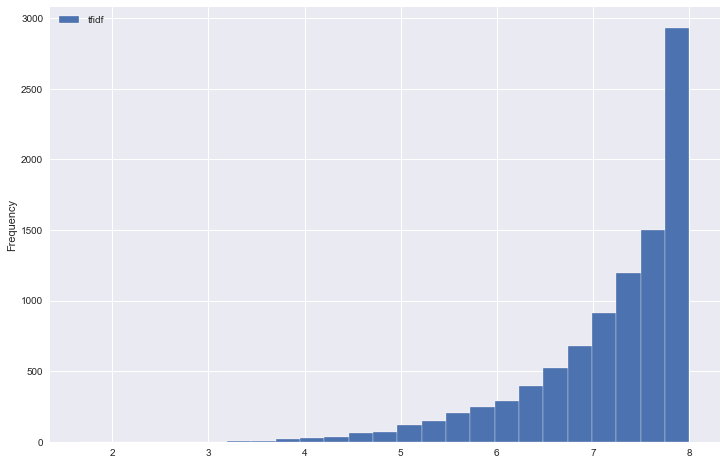

In [58]:
tfidf.plot(kind='hist', bins=25, figsize=(12,8))

In [59]:
def plot_word_cloud(terms, header):
    text = terms.index
    text = ' '.join(list(text))
    wordcloud = WordCloud(max_font_size=30).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(header, fontsize=30)
    plt.axis("off")
    plt.show()

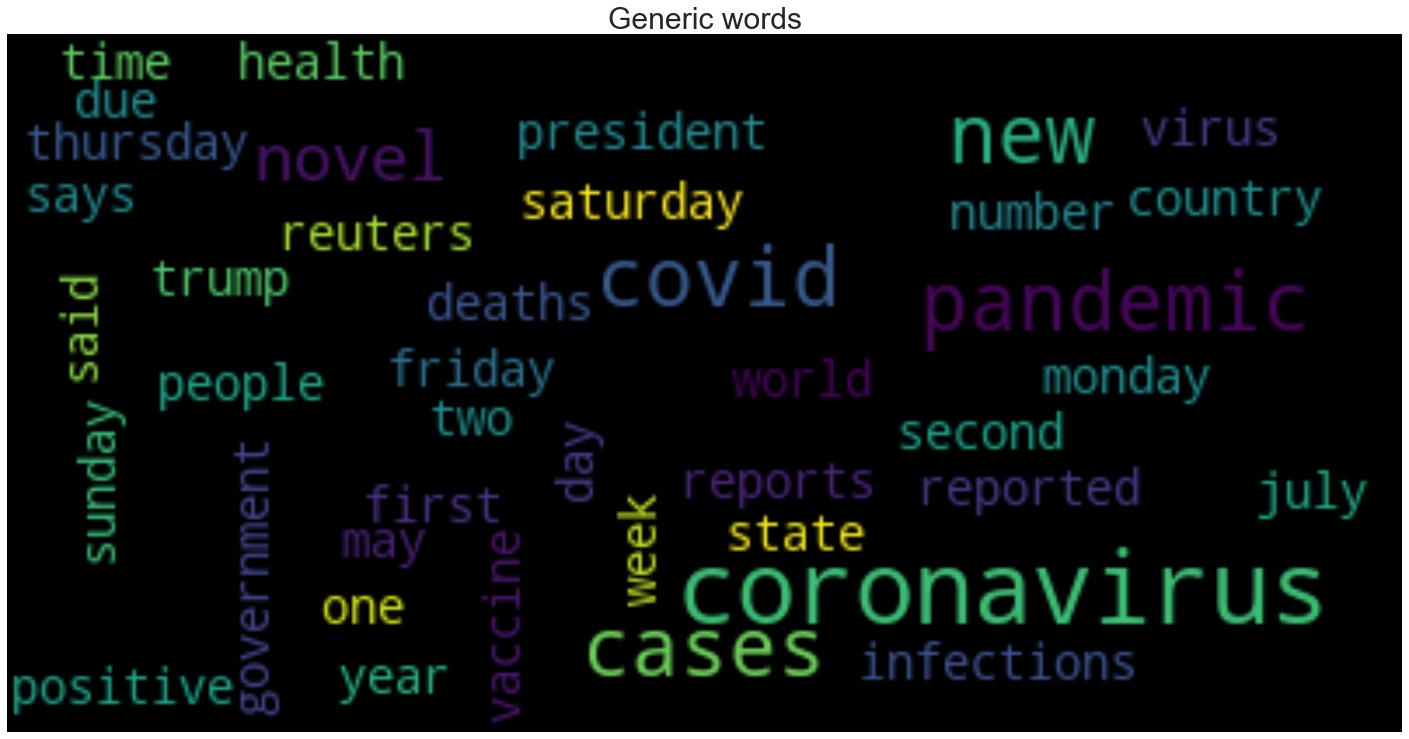

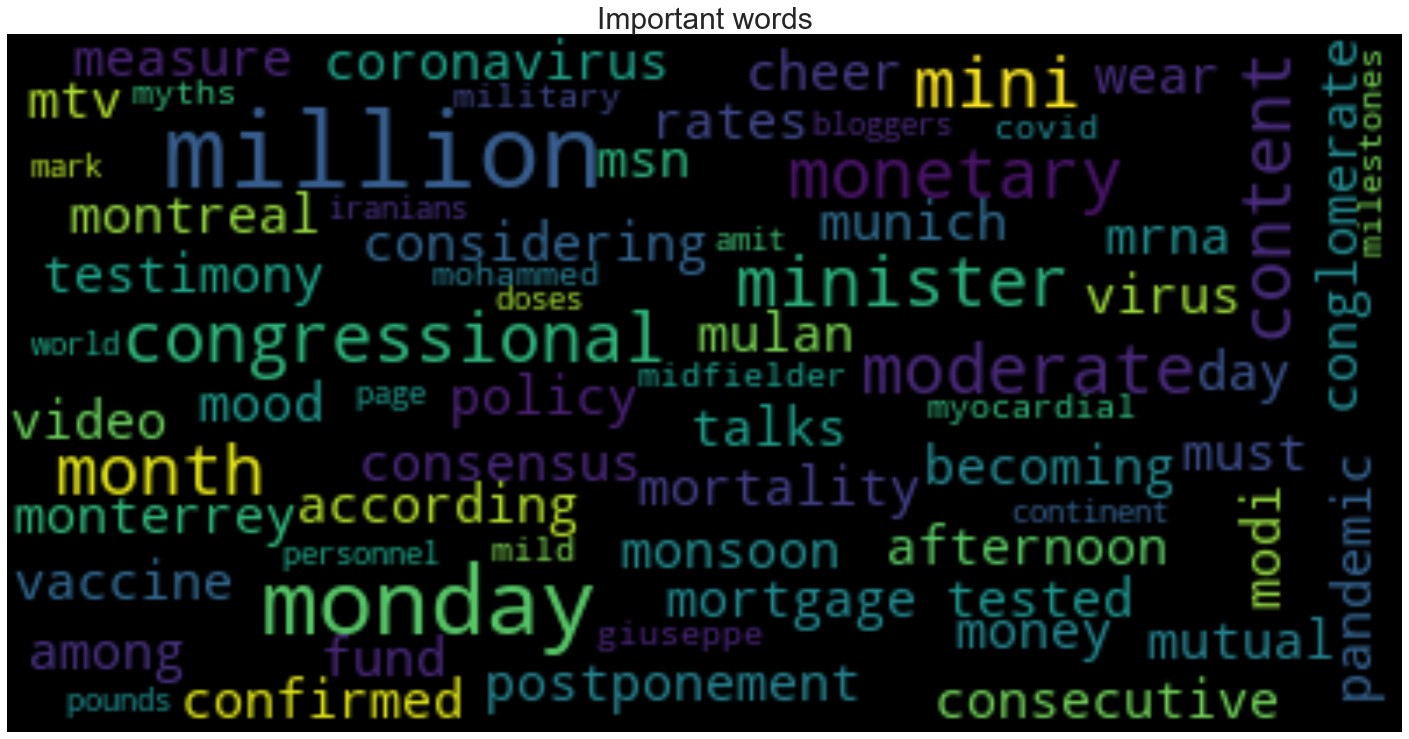

In [60]:
wordcloud1 = plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(50), 'Generic words')

wordcloud2 = plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(50), 'Important words')


As we can see from the wordclouds, the lowest tfidf scores gives us very generic words as these are the most common words found across all combined_text. Words like people, day, week, cases, deaths, virus etc. got a low score as a penalty for not being relevant.

The 'Important words' wordclouds shows us the less common words that carry more meaning in outlining the underlying topics.

Let's reduce the 9500 something features/dimensions by PCA dimentionality reduction to do some clustering.

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(6599, 3331)

In [62]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

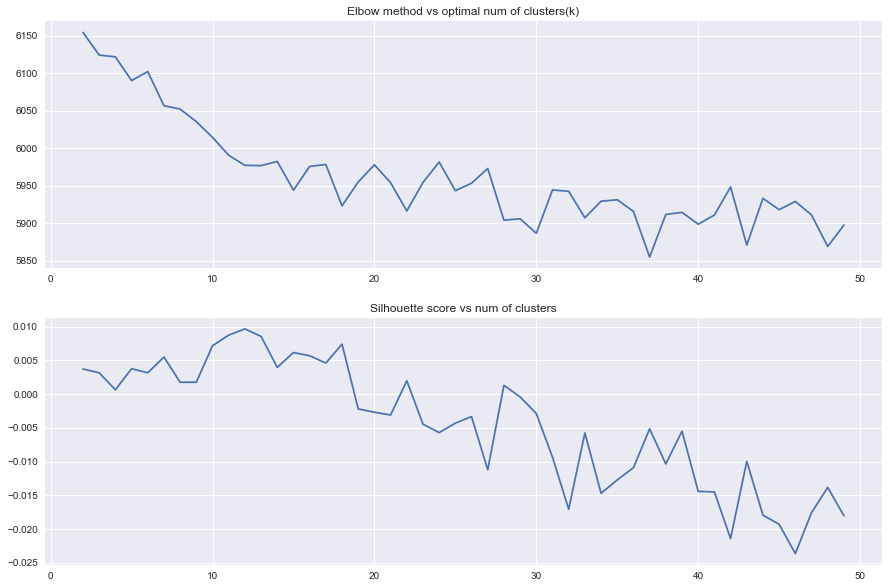

In [68]:
inertias = []
sil_scores = []
k_max = 50
for k in range(2, k_max):
    k_means = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42)
    k_means.fit(X_reduced)
    sil_score = silhouette_score(X_reduced, k_means.labels_)
    sil_scores.append(sil_score)
    inertias.append(k_means.inertia_)


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1.plot(range(2, k_max), inertias)
ax1.set_title('Elbow method vs optimal num of clusters(k)')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)


In this plot we can see that the better k values are between 22-38. After that, the decrease in distortion is not as significant. Taking the inertias and silhouette score in consideration, we will use k=30.

In [91]:
k = 40

k_means_model = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42)
k_means = k_means_model.fit(X_reduced)
k_means_clusters = k_means.predict(X_reduced)
df_processed['clusters'] = k_means_clusters

In [92]:
# Let's look at the keywords that describe each cluster

centroids = k_means.cluster_centers_.argsort()[:, ::-1]
key_terms = vectorizer.get_feature_names()
all_keywords = []
for i in range(k):
    topic_keywords = []
    for j in centroids[i, :10]:
        topic_keywords.append(key_terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['cluster_{0}'.format(i) for i in range(k)], 
                           columns=['keyword_{0}'.format(i) for i in range(10)],
                           data=all_keywords)
keywords_df
    

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,keyword_9
cluster_0,according report,adjust,andrew cuomo,accounting,allegations,appeals,abrupt,amsterdam,according new,academics
cluster_1,abruptly,able,absence,abuja,abhishek bachchan,achmad yurianto,ability,across globe,ace,adam
cluster_2,abandoned,abruptly,academic,abhishek bachchan,accelerate,abuse,abhishek,aboard,abc,able
cluster_3,abhishek,abroad,ability,abuja,academic,ace,abrupt,achieved,according latest,according research
cluster_4,abhishek bachchan,ability,abroad,able,abuse,according latest,across canada,abuja reuters,according survey,ace
cluster_5,across asia,al,alert,amp,airline,ally,africasouth,ami,alleged corruption,action
cluster_6,abattoir,able,abroad,ability,abruptly,abrupt,abc,abhishek,accept,access trusted
cluster_7,academic,abuja,abandoned,access,according new,accessible,acquired,accurate,accepting,accuses
cluster_8,among children,backlog,anxiety,announced saturday,beautiful,british columbians,blames,bike,basic,back production
cluster_9,abruptly,abuja,able,absence,abhishek bachchan,ability,abuse,accelerating,action,adam


#### Dimensionality Reduction with t-SNE

Using t-SNE we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the combined_text can be plotted.

In [93]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_2d = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 6599 samples in 3.818s...
[t-SNE] Computed neighbors for 6599 samples in 733.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6599
[t-SNE] Computed conditional probabilities for sample 2000 / 6599
[t-SNE] Computed conditional probabilities for sample 3000 / 6599
[t-SNE] Computed conditional probabilities for sample 4000 / 6599
[t-SNE] Computed conditional probabilities for sample 5000 / 6599
[t-SNE] Computed conditional probabilities for sample 6000 / 6599
[t-SNE] Computed conditional probabilities for sample 6599 / 6599
[t-SNE] Mean sigma: 0.348422
[t-SNE] KL divergence after 50 iterations with early exaggeration: 78.273628
[t-SNE] KL divergence after 1000 iterations: 2.235171


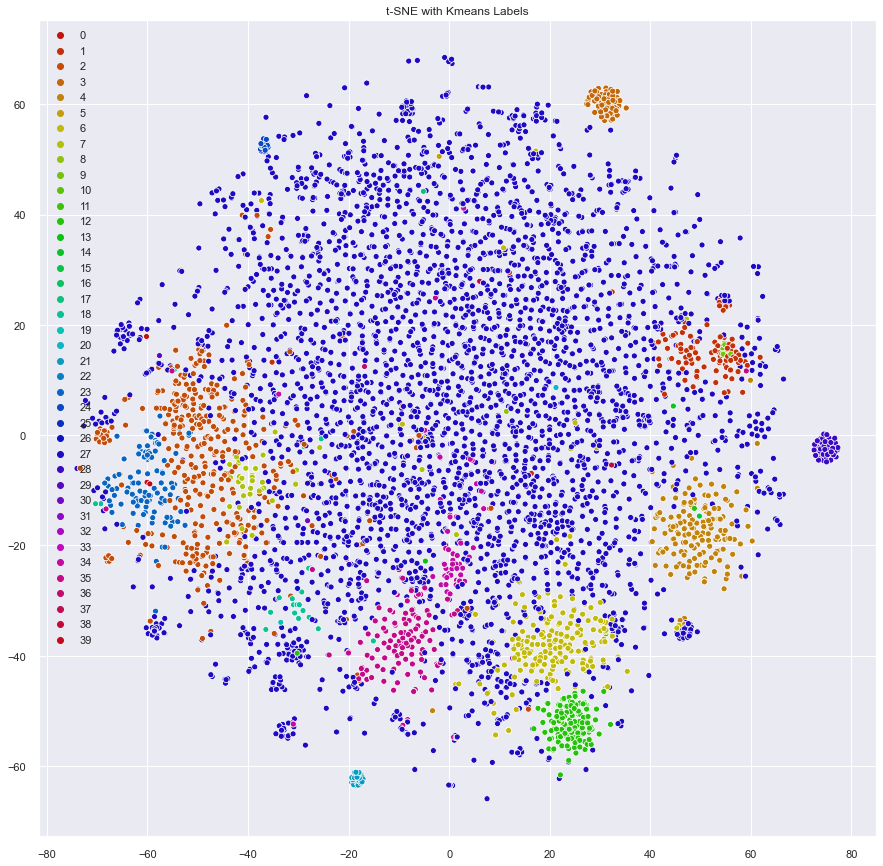

In [94]:
#sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(40, l=.4, s=.9)

# plot
sns.scatterplot(X_2d[:,0], X_2d[:,1], hue=k_means_clusters, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

In [95]:
tsne_tfidf_df = pd.DataFrame(X_2d)
tsne_tfidf_df.columns = ['x', 'y']
tsne_tfidf_df['category'] = df_processed['category']
tsne_tfidf_df['description'] = df_processed['description']

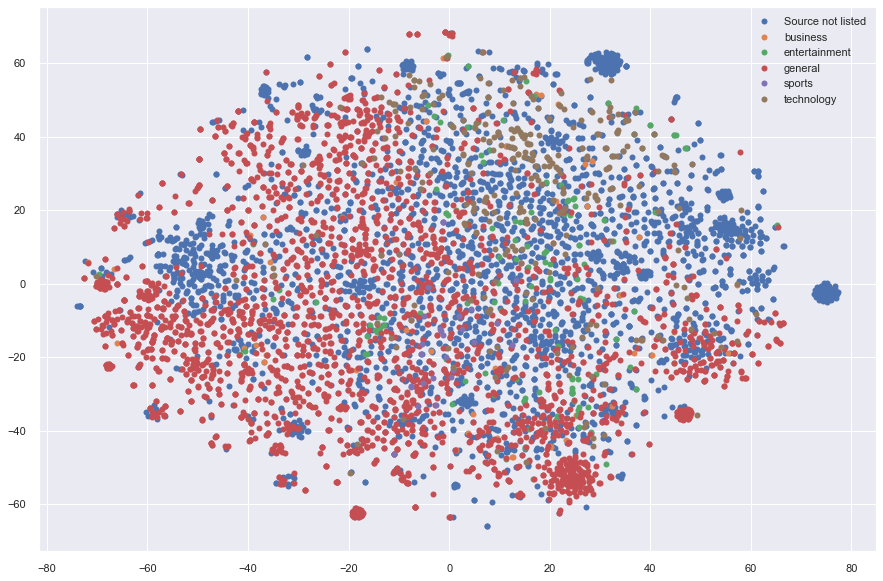

In [96]:
groups = tsne_tfidf_df.groupby('category')
fig, ax = plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
ax.legend()
plt.show()
